<a href="https://colab.research.google.com/github/GabrielTB1/Pandas_IO/blob/main/Pandas_IO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criando os nomes

In [1]:
import pandas as pd

In [2]:
nomes_f = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-f.json')
nomes_m = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-m.json')

In [3]:
nomes_f.sample(5)

,nome,regiao,freq,rank,sexo
182,LIDIANE,0,86963,183,F
77,MARINA,0,207760,78,F
3,ANTONIA,0,588783,4,F
81,MICHELE,0,200531,82,F
96,TANIA,0,172242,97,F


In [4]:
nomes_m.sample(5)

,nome,regiao,freq,rank,sexo
36,ROBERTO,0,435832,37,M
168,CRISTIAN,0,77504,169,M
142,HUGO,0,100685,143,M
83,RENAN,0,170182,84,M
50,VINICIUS,0,302419,51,M


In [5]:
print('Quantidade de nomes: ' + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


In [6]:
frames = [nomes_f, nomes_m]

In [7]:
nomes = pd.concat(frames)['nome'].to_frame()

In [8]:
nomes.sample(5)

,nome
61,BIANCA
96,EVERTON
134,VERONICA
171,VALDEMIR
3,ANTONIA


# Incluindo ID dos alunos

In [9]:
import numpy as np
np.random.seed(123)

In [10]:
total_alunos = len(nomes)
total_alunos

400

In [11]:
nomes["id_aluno"] = np.random.permutation(total_alunos) + 1

In [12]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [13]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [14]:
nomes.sample(5)

,nome,id_aluno,dominio
84,SEVERINO,78,@dominiodoemail.com.br
0,JOSE,331,@servicodoemail.com
179,IAGO,340,@dominiodoemail.com.br
10,SANDRA,174,@dominiodoemail.com.br
171,TERESINHA,45,@dominiodoemail.com.br


In [15]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [16]:
nomes.sample(5)

,nome,id_aluno,dominio,email
114,ARTHUR,320,@dominiodoemail.com.br,arthur@dominiodoemail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominiodoemail.com.br,helena@dominiodoemail.com.br
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br


# Criando a tabela Cursos

In [17]:
!pip3 install html5lib
!pip3 install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import html5lib

In [19]:
# URLS utilizadas nas aulas estão indisponiveis
# url = 'http://tabela-cursos.herokuapp.com/index.html'
# cursos = pd.read_html(url)
# cursos

In [20]:
lista = ['Lógica de programação', 'Java para Web', 'C# para Web',
         'Ruby on Rails', 'Cursos de Python', 'PHP com MySql', 'NET para web',
         'Novas integrações com Java', 'TDD com Java', 'Código limpo com C#',
         'Preparatório para certificação Java', 'Hardware básico',
         'Persistência com .NET', 'Desenvolvendo jogos', 'Análise de dados',
         'Estatística básica', 'Internet das coisas', 'Programação funcional',
         'Boas práticas em Java', 'Orientação objetos com Java']
cursos = pd.DataFrame(lista, columns = ['Nome do curso'])
cursos.head(5)

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o index de cursos

In [21]:
cursos = cursos.rename(columns={'Nome do curso' : 'nome_do_curso'})

In [22]:
cursos.head(5)

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [23]:
cursos['id'] = cursos.index + 1

In [24]:
cursos.head(5)

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [25]:
cursos = cursos.set_index('id')

In [26]:
cursos.head(5)

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Matriculando os alunos nos cursos

In [28]:
nomes.sample(5)

,nome,id_aluno,dominio,email
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br
144,VINICIOS,147,@servicodoemail.com,vinicios@servicodoemail.com
69,TEREZA,151,@servicodoemail.com,tereza@servicodoemail.com
105,PABLO,141,@dominiodoemail.com.br,pablo@dominiodoemail.com.br
109,CELSO,266,@servicodoemail.com,celso@servicodoemail.com


In [34]:
nomes['matriculas'] = np.ceil(np.random.exponential(size = total_alunos)* 1.5).astype(int)

In [35]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
188,POLIANA,369,@servicodoemail.com,poliana@servicodoemail.com,4
12,AMANDA,217,@servicodoemail.com,amanda@servicodoemail.com,2
185,SHEILA,116,@dominiodoemail.com.br,sheila@dominiodoemail.com.br,1
7,FERNANDA,288,@servicodoemail.com,fernanda@servicodoemail.com,2
26,RITA,12,@dominiodoemail.com.br,rita@dominiodoemail.com.br,3


In [36]:
nomes.matriculas.describe()

count    400.00000
mean       2.09250
std        1.46947
min        1.00000
25%        1.00000
50%        2.00000
75%        3.00000
max        9.00000
Name: matriculas, dtype: float64

In [37]:
import seaborn as sns

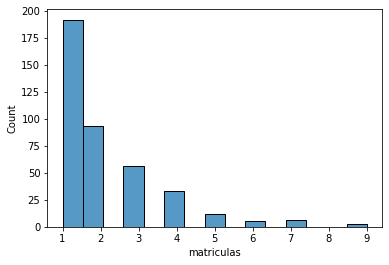

In [39]:
sns.histplot(nomes.matriculas)

In [41]:
nomes.matriculas.value_counts()

1    192
2     93
3     56
4     33
5     12
7      6
6      5
9      3
Name: matriculas, dtype: int64